<a href="https://colab.research.google.com/github/theone67833/bigdata1/blob/main/%E3%80%8C%E3%80%8C0518_ipynb_%E4%BD%9C%E6%A5%AD%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

安裝套件

In [2]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(SportsAnalytics)

In [10]:
library(ggplot2)

線性回歸

`geom_smooth()` using formula 'y ~ x'




Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           29.02535             -0.01681              1.31181  
         PositionPF           PositionPG           PositionSF  
          -29.81577            -57.56647            -39.12716  
         PositionSG  
          -58.55942  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    117300000 
Residual Deviance: 1963000 	AIC: 5966

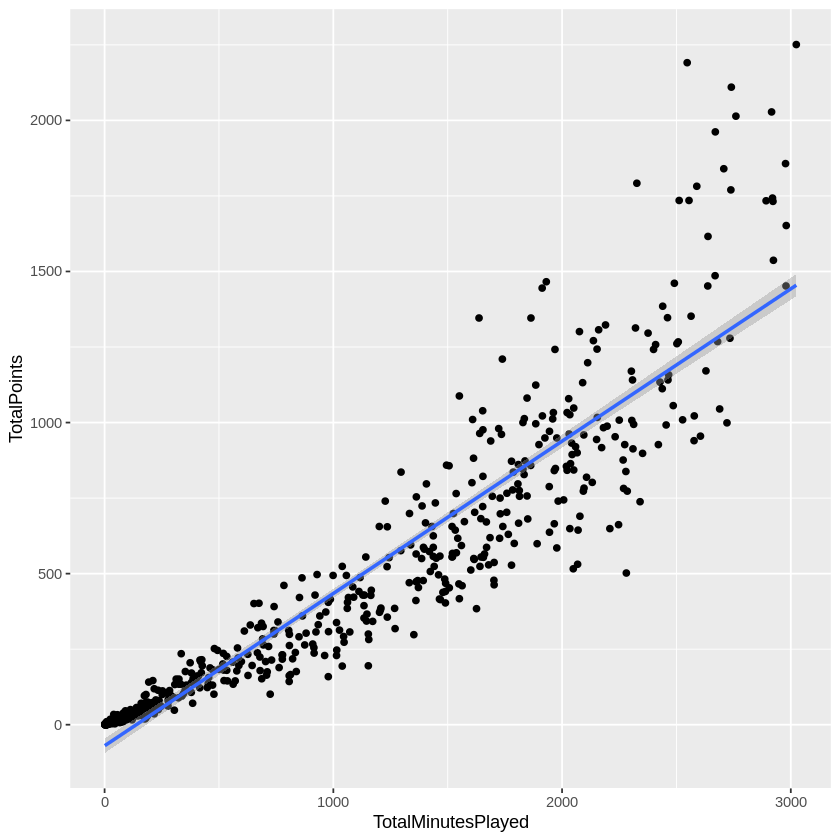

In [13]:
NBA1718<- fetch_NBAPlayerStatistics("17-18")
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+geom_smooth(method = "glm")
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1718)

羅吉斯回歸

In [15]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [16]:
mydata$rank<-factor(mydata$rank)
mylogit<-glm(admit~gre+gpa+rank,
      data=mydata,family="binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


決策樹

In [18]:
install.packages("rpart")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(rpart)

In [22]:
DT <-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)

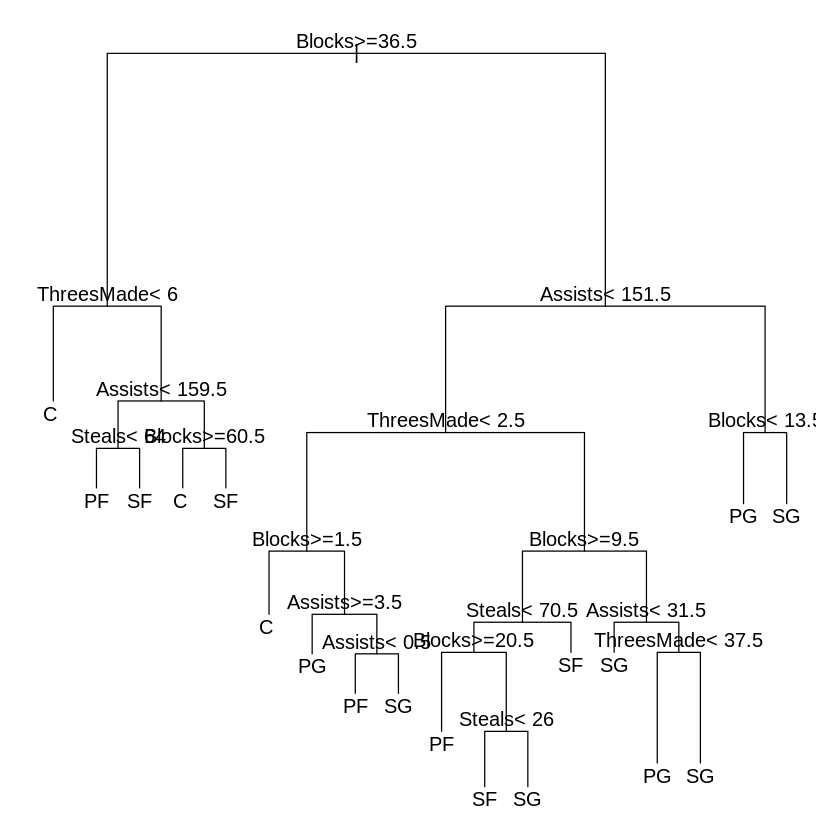

In [23]:
par(mfrow=c(1,1),mar=rep(1,4))
plot(DT)
text(DT,use.n=F,cex=1)

In [24]:
install.packages("rpart.plot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



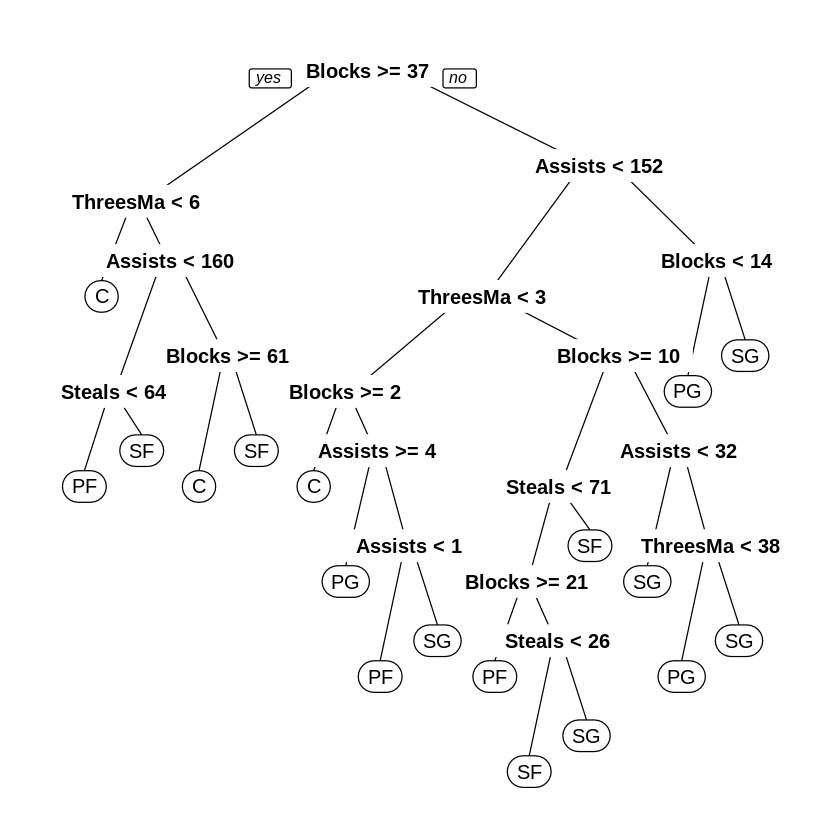

In [25]:
library(rpart.plot)
prp(DT)

關聯式規則

In [28]:
install.packages("arules")
install.packages("datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [29]:
library(arules)
library(datasets)

In [32]:
data(Groceries)
Groceries@data@Dim

[1]  169 9835

In [37]:
rules <-apriori(Groceries,
        parameter=list(supp=0.001,conf=0.8),
        control=list(verbose=F))
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [38]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [42]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
    appearance=list(default="lhs",rhs="bottled beer"),
    control=list(verbose=F))
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {soda,liquor}           => {bottled beer} 0.0012  0.57       0.0021    7.1
[3] {liquor}                => {bottled beer} 0.0047  0.42       0.0111    5.2
[4] {herbs,bottled water}   => {bottled beer} 0.0012  0.40       0.0031    5.0
[5] {whole milk,soups}      => {bottled beer} 0.0011  0.38       0.0029    4.7
    count
[1] 19   
[2] 12   
[3] 46   
[4] 12   
[5] 11   


作業

`geom_smooth()` using formula 'y ~ x'




Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1516)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           22.85222             -0.00654              1.27572  
         PositionPF           PositionPG           PositionSF  
          -39.41633            -65.03465            -38.52230  
         PositionSG  
          -52.17514  

Degrees of Freedom: 474 Total (i.e. Null);  468 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    9.9e+07 
Residual Deviance: 2e+06 	AIC: 5320

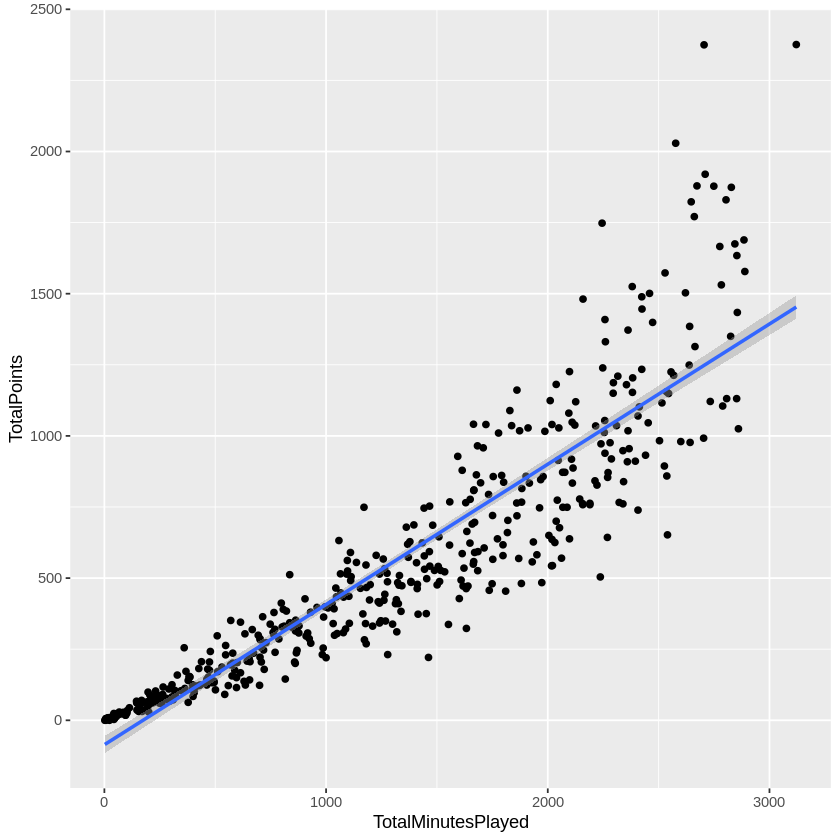

In [43]:
NBA1516<- fetch_NBAPlayerStatistics("15-16")
ggplot(NBA1516,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+geom_smooth(method = "glm")
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,
    data =NBA1516)